## 1. 패키지 불러오기

#### 설치가 되지 않은 패키지는 anaconda에서 pip install로 설치가능합니다.

In [6]:
!pip install pyLDAvis==3.2.2

  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135598 sha256=acf847cf388fe98fd5563ee1f4b4839f3c54cb1458428d93de7c64d7cae65bbe
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\2a\5b\b3\26b52781cdeea9c815e147cfd4ac4a0a3472bce92142115670
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492029 sha256=8be068f145c42a723e6853b1a9229a6ab4c326358ad2d87c1d8a36a56595341b
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a0\0b\ee\e6994fadb42c1354dcccb139b0bf2795271bddfe6253ccdf11
Successfully built pyLDAvis future


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
import os
from gensim.models.ldamodel import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import gensim.corpora as corpora
import gensim
from gensim import models
import pyLDAvis.gensim 
from nltk import bigrams

In [2]:
import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/H2GTRE.ttf").get_name()
rc('font', family=font_name)

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2. 데이터 불러오기

In [3]:
data = pd.read_excel('230502_text의뢰(120)_용어수정.xlsx')

data.head()

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


230502 ID  Final ID   AU  AU_N  FLD   BZ            JN  JN_F    YR   
0          1       1.0  장규현   2.0  2.0  2.0         상담학연구   NaN  2022  \
1          2       2.0  이재용   4.0  2.0  2.0        초등상담연구   2.0  2022   
2          3       3.0  이영주   3.0  7.0  2.0   학습자중심교과교육연구   2.0  2022   
3          4       4.0  곽지은   3.0  1.0  2.0   학습자중심교과교육연구   2.0  2022   
4          5       5.0  김석만   3.0  3.0  2.0  차세대융합기술학회논문지   NaN  2022   

                                               제목   
0                            심리상담 챗봇에 대한 상담사들의 인식  \
1          인공지능 기반 챗봇의 상담 활용 사례 분석 및 학교 상담용 챗봇 개발   
2     비대면상담의 내담자 경험에 대한 탐색: 원격상담 모바일 어플리케이션을 중심으로   
3  대학생의 사회불안에 대한 수용전념치료 스마트폰 어플리케이션리케이션 적용 및 효과검증   
4      모바일 어플리케이션 기반 정신건강 관리 사례연구: 의료기관 종사자를 중심으로   

                                                국문초록  
0  는 인공지능을 활용하여 문자나 음성을 통해 사용자(내담자)에게 심리상담 서비스를 제...  
1  인공지능은 우리 삶 속에서 매우 다양하게 활용되고 있으며, 그 영역은 점차 확대되는...  
2  목적 는 국내 원격상담 어플리케이션을 중심으로 비대면상담에 대한 내담자 경험을 알아...  
3  목적 에서는 사회불안에 대한 수용전념치료 어플리케이션리케이션을 구성 및 제작하고, ...  
4  의 의의는 어플리케이션리케이션 ‘In mind’가 근로자의 정신건강을 효율적으로 관...

In [4]:
data['국문초록'][2]

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'목적 는 국내 원격상담 어플리케이션을 중심으로 비대면상담에 대한 내담자 경험을 알아보고자 하였다.방법 연구를 위해, 해당 원격상담 어플리케이션에서 유료로 비대면상담의 경험이 있는 내담자들을 대상으로 수집된 자료를 수정된 합의적질적연구(Consensual Qualitative Rese증강현실ch-Modified; CQR-M) 방법으로 분석하였다. 연구 자료의 수집기간은 2021년 7 월부터 9월이었으며, 수집된 자료를 2021년 10월부터 3개월의 기간동안 분석하였다.결과 첫째 원격상담 어플리케이션을 통한 비대면상담의 장점 요소는 3개 영역의, 24개의 범주가 도출되었다. 비대면상담의 접근 용이성과신속성, 비대면상담이 주는 심리적 안정감, 브랜드 신뢰도가 포함된다. 둘째 원격상담 어플리케이션을 통한 비대면상담의 단점 요소는 4개의영역, 14개의 범주가 도출되었다. 상담시 느끼는 불안감, 불편감, 의사소통 어려움, 상담 기법 내용이 포함된다. 셋째 원격상담 어플리케이션을통한 비대면상담의 보완 및 개선점에 대해서는 4개의 영역, 44개의 범주가 도출되었다. 보완요소로는 대면 상담 진행시 보완요소, 상담윤리 강화, 비대면상담 중요성, 상담방법에 따른 전달력 개선문제의 내용이 포함된다.결론 원격상담 어플리케이션에서 실시하는 비대면상담의 보완 및 개선점을 통한 앞으로의 방향성에 대하여 논의하였다.'

## 3. 텍스트 전처리

### 괄호 안 단어 제거

In [5]:
import re

def remove_bracket(text):
    pattern = r'\([^)]*\)'
    text = re.sub(pattern=pattern, repl='', string = text)
    return text

data['국문초록'] = data['국문초록'].map(remove_bracket)

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### - 영어 제거

In [6]:
def remove_english(text):
    text = re.sub('[a-zA-z]','',text)
    return text


data['국문초록'] = data['국문초록'].map(remove_english)

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### - 한단어로 합치기

In [7]:
onewords = pd.read_excel('one_words.xlsx')
onewords = [[word] for word in onewords['Words']]

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### - 단어 바꾸기

In [8]:
changewords = pd.read_excel('change.xlsx')
changeword_list = []
for i in range(changewords.shape[0]):
    changeword_list.append([changewords['Change'][i], changewords['Original'][i]])

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
comb_words = onewords + changeword_list
comb_words[-9] = ['전화상담 인터넷게시판상담', '전화상담 인터넷상담']
comb_words[0] = ['비대면상담', '비대면 상담']
comb_words[1] = ['사이버상담', '사이버 상담']
comb_words[2] = ['화상상담', '화상 상담']
comb_words[3] = ['전화상담', '전화 상담']
comb_words[4] = ['챗봇상담', '챗봇 상담']
comb_words[5] = ['대면상담', '대면 상담']
comb_words = comb_words + [['비대면']]

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
comb_words

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['비대면상담', '비대면 상담'],
 ['사이버상담', '사이버 상담'],
 ['화상상담', '화상 상담'],
 ['전화상담', '전화 상담'],
 ['챗봇상담', '챗봇 상담'],
 ['대면상담', '대면 상담'],
 ['인공지능'],
 ['진로상담'],
 ['심리상담'],
 ['통제집단'],
 ['실험집단'],
 ['치료집단'],
 ['정신건강서비스'],
 ['인지치료'],
 ['합의적질적연구'],
 ['한국판사회적상호작용불안척도'],
 ['한국판사회불안수용행동척도'],
 ['간이정신진단검사단축형'],
 ['심리적안녕감척도'],
 ['정신건강관리'],
 ['우울불안검사'],
 ['회복탄력성검사'],
 ['스트레스검사'],
 ['종결경험'],
 ['비대면화상상담'],
 ['하위주제'],
 ['중심의미'],
 ['의미단위'],
 ['환경통제력'],
 ['상호작용'],
 ['매체특성'],
 ['종결고려'],
 ['개선방안'],
 ['상담매체수용성'],
 ['한국판핵심상담성과도구'],
 ['종결진행'],
 ['작업동맹'],
 ['위급상황'],
 ['윤리적문제'],
 ['메타버스심리상담'],
 ['직무스트레스'],
 ['채팅상담'],
 ['인마인드'],
 ['의료기관종사자'],
 ['여행사종사자'],
 ['사전적응과정'],
 ['직장인스트레스반응검사'],
 ['상담수련기관'],
 ['후속연구'],
 ['디지털가면'],
 ['자기개방'],
 ['상담과정'],
 ['상담매체'],
 ['공황장애'],
 ['피해망상'],
 ['심리지원체계'],
 ['심리치료병원'],
 ['정신건강전문가'],
 ['아디모형'],
 ['청소년상담기관상담자'],
 ['전문적도움추구태도'],
 ['만족도척도'],
 ['대응표본'],
 ['독립표본'],
 ['긍정적태도'],
 ['부정적태도'],
 ['사회문제'],
 ['스마트폰과의존방지'],
 ['유해애플리케이션'],
 ['포커스그룹인터뷰'],
 ['학습동기'],
 ['정서조절능력'],
 ['동기강화'],
 ['이원반복측정분산분석'],
 ['

### - 대체하기

In [11]:
Transform_words = [' ' + 'TRSF' * (i+1) + ' ' for i in range(len(comb_words))]
Transform_words[0:3]

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[' TRSF ', ' TRSFTRSF ', ' TRSFTRSFTRSF ']

In [12]:
def Word_transform(Text, word_list, to_word):
    for word in word_list:
        Text = str(Text).replace(word,to_word)
    return Text

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
for i in range(len(comb_words)):
    data['국문초록'] = [Word_transform(txt, comb_words[i], Transform_words[i]) for txt in data['국문초록']]    

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### (1) Tokenize

#### Textmining을 하기위해서는 List형태로 단어들은 Tokenize 해야 합니다.

In [14]:
Okt = Okt()

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# 명사
tags = ['Noun', 'Alpha']

# 명사, 형용사
# tags = ['Noun', 'Adjective', 'Alpha']
stopwords = ['상담','연구','집단','결과', '분석','대상','실시','방법','통해','기반','진행','목적','영역','범주','도출','유형','논문','명의'
            '의의','분야','가지','점수','자의','경우','심층','제언','기존','둘째','다음','첫째','접근','기관','현재','처치','이상','주요',
            '가장','통한','후속','모두','추후','그룹','이후','로서','파악','참가자','최근','따라서','별로','소재','시사','선택','정도',
            '표본','동안','대상자','우리','모집','크게','집중','때문','회기','유도','기여','반야','미하','이전','선원','응답','모든',
            '연구자','방법론','조건','로써','간의','가가','상이','도모','이하','로부터','로움','음으로','광역시','정리','부분','순위','양궁',
            '국한','배정','자리','최신','학회','점점','부합','부정정','엔진','설문지','한지','뮌스터','질리','언스','진자','유무','기별','대한','위해','대해','또한',
            '잘되지','PubMed','EMBASE','RISS','성은','접목','이나','사이버대학교']

def Tokenizer(text):
    morphs = Okt.pos(text)
    pos = []

    for word, tag in morphs:
        if(word in stopwords): 
            continue
        if tag in tags:
            pos.append(word)

    return pos

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
Token = [Tokenizer(text) for text in data['국문초록']]

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### - 합성어 복원

In [17]:
def Word_restore(Text, word1, word2):
    transformed_list = []
    for word in Text:
        if word1 in word:
            word = word2
        transformed_list.append(word)
    return transformed_list

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
restore_words = [word_list[0] for word_list in comb_words]

Transform_words.reverse()
restore_words.reverse()


for i in range(len(restore_words)):
    Token = [Word_restore(token, Transform_words[i][1:-1], restore_words[i]) for token in Token] 
Token[0:3]

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['인공지능',
  '활용',
  '문자',
  '음성',
  '사용자',
  '심리상담',
  '서비스',
  '제공',
  '심리상담',
  '챗봇',
  '심리상담',
  '사',
  '인식',
  '혼합',
  '탐색',
  '설계',
  '방식',
  '조사',
  '명의',
  '심리상담',
  '면담',
  '면담',
  '질적',
  '자료',
  '바탕',
  '작성',
  '심리상담',
  '온라인',
  '설문',
  '총',
  '명의',
  '자료',
  '심리상담',
  '챗봇',
  '의',
  '장',
  '단점',
  '및',
  '기능',
  '심리상담',
  '챗봇',
  '의',
  '활용',
  '담',
  '대면상담',
  '챗봇',
  '의',
  '활용',
  '가능성',
  '심리상담',
  '챗봇',
  '이',
  '심리상담',
  '현장',
  '수',
  '영향',
  '안전',
  '윤리',
  '고려',
  '사항',
  '등',
  '관',
  '심리상담',
  '사',
  '인식',
  '심리상담',
  '챗봇',
  '심리상담',
  '사',
  '용도',
  '보통',
  '심리상담',
  '사',
  '챗봇',
  '의',
  '장점',
  '기대',
  '단점',
  '우려',
  '더',
  '것',
  '심리상담',
  '챗봇',
  '이',
  '제공',
  '기능',
  '전반',
  '평가',
  '심리상담',
  '장면',
  '심리상담',
  '챗봇',
  '의',
  '활용',
  '가능성',
  '긍정',
  '인식',
  '심리상담',
  '챗봇',
  '심리상담',
  '사',
  '인식',
  '조사',
  '국내',
  '최초',
  '심리상담',
  '심리상담',
  '챗봇',
  '이',
  '상호',
  '보완',
  '관계',
  '유지',
  '수',
  '음',
  '데',
  '의의'],
 ['인공지능',
  '은',
  '삶',
  '속',
  '매우',


#### - 한글자 제거

In [19]:
def one_char_remove(Token):
    Token = [word for word in Token if len(word) > 1]
    return Token

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
Token = [one_char_remove(token) for token in Token]

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 4. 빈도 분석

In [21]:
os.makedirs('./빈도분석', exist_ok = True)

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
def visulize(noun_list, filename, white = True):
    if white == True:
        wordcloud = WordCloud(width=2000, height=1000, font_path = "c:/Windows/Fonts/H2GTRE.ttf", collocations=True, background_color='white')
    else:
        wordcloud = WordCloud(width=2000, height=1000, font_path = "c:/Windows/Fonts/H2GTRE.ttf", collocations=True)
    wordcloud.generate_from_frequencies(dict(noun_list))
    wordcloud.to_file(filename)

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
def wordcloud_Rank(token, N = 30, white = True):
    filename = os.path.join('./빈도분석', 'keyword_wordcloud.png')
    filename_csv = os.path.join('./빈도분석', 'keyword_count.csv')
    
    flatten_tokens = list(itertools.chain(*token))
    token_count = Counter(flatten_tokens)
    Top_token_count = token_count.most_common(N)
    
    Top_token_count_df = token_count.most_common(1000)
    word_count = pd.DataFrame(Top_token_count_df)
    word_count.columns = ['Word', 'Count']
    word_count.to_csv(filename_csv, index = False, encoding='euc-kr')
    
    visulize(Top_token_count, filename, white)
    return word_count

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
word_count = wordcloud_Rank(Token, 100, white = True)
word_count.head(30)

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\user\miniconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


Word  Count
0     심리상담    597
1       경험    171
2     화상상담    148
3       효과    124
4    비대면상담    119
5     프로그램    108
6       심리    104
7       챗봇     97
8   어플리케이션     93
9       치료     93
10      활용     90
11    가상현실     87
12      개발     86
13     온라인     84
14      자료     75
15      인식     74
16      사용     71
17     청소년     66
18    인공지능     59
19    채팅상담     58
20      사회     57
21     코로나     56
22      윤리     53
23      환경     52
24     콘텐츠     52
25      제공     50
26      기술     50
27      관련     50
28      불안     49
29      참여     49

## 5. 토픽 분석

In [25]:
id2word=corpora.Dictionary(Token)
id2word.filter_extremes(no_below = 3) #3회 이하로 등장한 단어는 삭제
texts = Token
corpus=[id2word.doc2bow(text) for text in texts]

os.makedirs('./토픽분석', exist_ok = True)

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### (1) 토픽모델링 결과 확인

In [30]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = gensim.models.coherencemodel.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score") 
    plt.legend(("coherence_values"), loc='best') 
    plt.savefig('./토픽분석/토픽개수선정.png')
    plt.show()
    
    return model_list, coherence_values

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


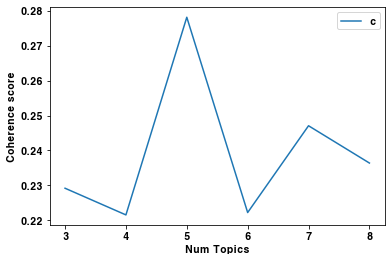

In [31]:
start_topic_num = 3
end_topic_num = 8
step = 1

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=start_topic_num, limit=end_topic_num+1, step=step)

In [32]:
best_topic_num = range(start_topic_num, end_topic_num+1, step)[coherence_values.index(max(coherence_values))]
print("Best topic number: {}".format(best_topic_num))

Best topic number: 5


c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
best_model = LdaModel(corpus=corpus, num_topics=5, id2word=id2word)

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
#best_model = model_list[coherence_values.index(max(coherence_values))]
topics = best_model.print_topics(num_words=8) 
topics

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.021*"경험" + 0.020*"챗봇" + 0.014*"비대면상담" + 0.013*"전화상담" + 0.012*"활용" + 0.012*"환경" + 0.012*"비대면" + 0.011*"어플리케이션"'),
 (1,
  '0.029*"어플리케이션" + 0.022*"챗봇" + 0.020*"효과" + 0.016*"온라인" + 0.015*"사용" + 0.013*"화상상담" + 0.012*"개발" + 0.011*"활용"'),
 (2,
  '0.033*"화상상담" + 0.016*"콘텐츠" + 0.015*"치료" + 0.015*"자료" + 0.015*"인식" + 0.014*"경험" + 0.013*"비대면상담" + 0.013*"가상현실"'),
 (3,
  '0.030*"경험" + 0.020*"화상상담" + 0.019*"비대면상담" + 0.016*"심리" + 0.012*"인공지능" + 0.011*"윤리" + 0.010*"활용" + 0.009*"사례"'),
 (4,
  '0.026*"프로그램" + 0.021*"효과" + 0.019*"채팅상담" + 0.016*"치료" + 0.014*"가상현실" + 0.014*"사회" + 0.013*"어플리케이션" + 0.011*"개발"')]

In [35]:
topic_words = dict()

for i in range(5):
    words = [word for (word, prob) in best_model.show_topic(i, 20)]
    topic_words['Topic_' + str(i + 1)] = words
    
topic_words = pd.DataFrame(topic_words)

os.makedirs('./토픽분석', exist_ok = True)

topic_words.to_excel(os.path.join('./토픽분석', 'Topic Words.xlsx'), index = False)
topic_words.head(10)

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic_1 Topic_2 Topic_3 Topic_4 Topic_5
0      경험  어플리케이션    화상상담      경험    프로그램
1      챗봇      챗봇     콘텐츠    화상상담      효과
2   비대면상담      효과      치료   비대면상담    채팅상담
3    전화상담     온라인      자료      심리      치료
4      활용      사용      인식    인공지능    가상현실
5      환경    화상상담      경험      윤리      사회
6     비대면      개발   비대면상담      활용  어플리케이션
7  어플리케이션      활용    가상현실      사례      개발
8      심리     청소년      챗봇    가상현실      경험
9      위기      인식      효과     코로나     청소년

In [36]:
os.makedirs('./토픽분석', exist_ok = True)

title = '토픽모델링'
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(best_model, corpus, id2word)
pyLDAvis.display(vis)
pyLDAvis.save_html(vis, os.path.join('./토픽분석', 'Topic Plot.html'))

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: drop() takes from 1 to 2 positional arguments but 3 were given

## 6. TF-IDF

In [37]:
def get_tf_idf(Token):
    sentences = [' '.join(token) for token in Token]
    
    ## (1) 전체 문서의 수 계산
    doc_num = len(sentences)
    
    ## (2) Term-document Matrix 정의하기
    cv = CountVectorizer()
    tdm = cv.fit_transform(sentences)
    tdm = tdm.toarray()
    
    ## (3) 해당 단어의 총 Count 계산 (Term-document Matrix에서 Row sum 을 하면 계산 가능)
    words = cv.get_feature_names()
    word_count = tdm.sum(axis=0)
    
    ## (4) 해당 단어가 들어있는 문서의 수 계산 (Term-document Matrix의 값 중에서 1보다 큰경우 해당 단어가 있는 것이므로, 1보다 큰 경우를 1로 바꾸거 Row sum)
    tdm[tdm > 1] = 1
    word_doc = tdm.sum(axis=0)
    
    ## (5) TF-IDF 계산
    tf = word_count / doc_num
    idf = np.log(doc_num / word_doc)
    tf_idf = tf * idf
    
    ## (6) DataFrame으로 만들기
    TF_IDF = pd.DataFrame({'Word': words, 'TF': tf, 'IDF': idf, 'TF-IDF': tf_idf})
    return TF_IDF

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
tf_idf_df = get_tf_idf(Token)

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [39]:
tf_idf_df = tf_idf_df.sort_values(by = 'TF-IDF', ascending = False).reset_index(drop = True)
tf_idf_df.head()

c:\users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'tf_idf_df' is not defined

In [491]:
os.makedirs('./TF_IDF', exist_ok = True)
tf_idf_df.to_csv('./TF_IDF/tf_idf.csv', index = False, encoding = 'euc-kr')

## 7. Keyword Network

In [492]:
def min_max(x):
    return (x-min(x)) / (max(x) - min(x))

def make_Co_Keyword(Text):
    Co_Keyword = list(itertools.combinations(Text,2))
    Co_Keyword = [tuple(sorted((x,y))) for (x,y) in Co_Keyword if x != y]
    return Co_Keyword

def make_Edgelist(Token):
    Co_Keyword = [make_Co_Keyword(list(set(text))) for text in Token]
    Co_Keyword = list(itertools.chain(*Co_Keyword))
    Edge_list = list((x, y, v) for (x,y), v in Counter(Co_Keyword).items())
    return Edge_list

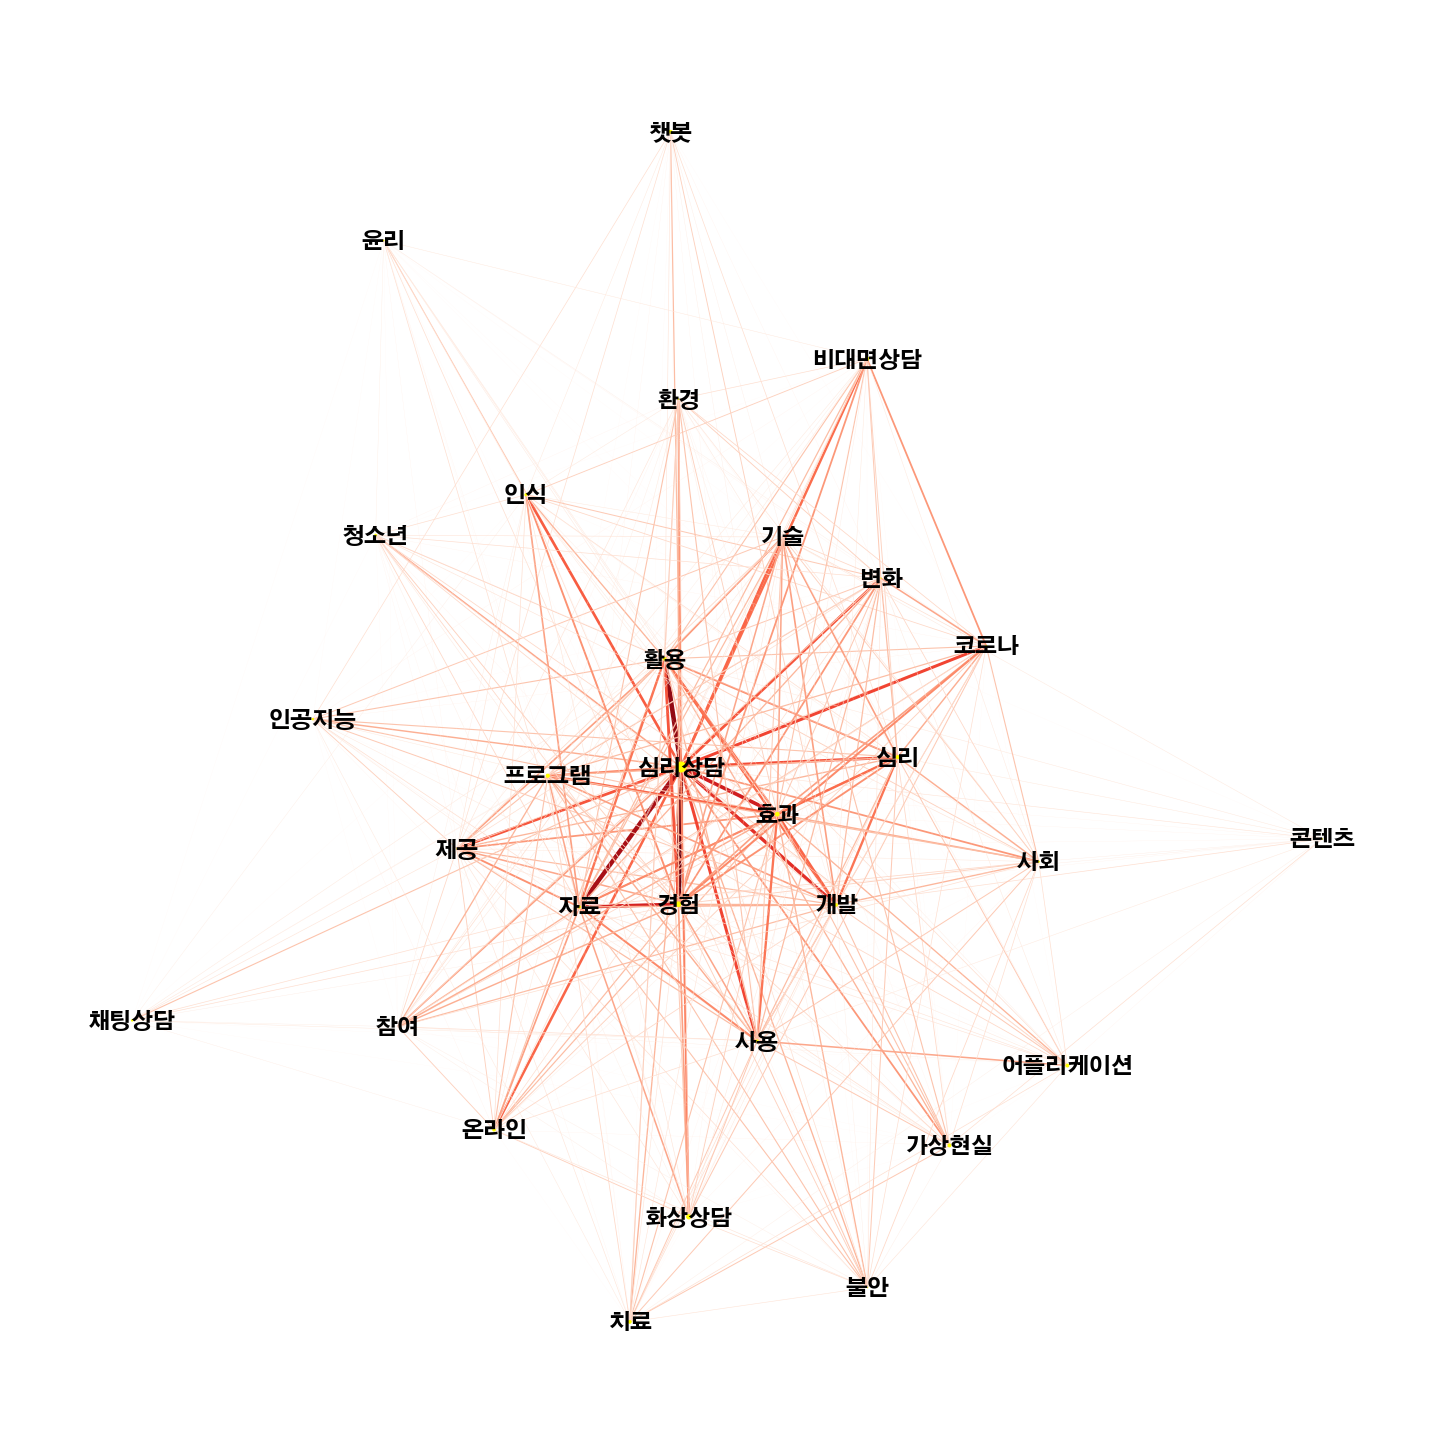

In [493]:
N = 30

flatten_tokens = list(itertools.chain(*Token))
## 상위 노출 키워드 리스트 추출
All_words = Counter(flatten_tokens)
Top_words = All_words.most_common(N)
Top_words = [word for (word, count) in Top_words]
Edge_list = make_Edgelist(Token)
## 그래프 생성
Top_Edge_list = list((x, y, v) for (x,y,v) in Edge_list if (x in Top_words and  y in Top_words))
G_top = nx.Graph()
for A,B, weight in Top_Edge_list: G_top.add_edge(A, B, weight=weight, distance = 1/weight)
width_top = list(nx.get_edge_attributes(G_top, 'weight').values())
degree = [All_words[node] * 60 for node in list(G_top.nodes)]
edges_top = G_top.edges()
weights = [G_top[u][v]['weight'] for u,v in edges_top]
    
## 시각화 Weight 설정
weights = min_max(np.array(weights))
degree = min_max(np.array(degree))
weights = [wei * 5  for wei in weights]
degree = [deg * 100  for deg in degree]

import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/H2GTRE.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

plt.figure(figsize=(20,20))
pos = nx.spring_layout(G_top, k = 0.5)
nx.draw(G_top, pos, width=weights, node_color= 'yellow', node_size = degree, edge_color=weights, edge_cmap=plt.cm.Reds)
nx.draw_networkx_labels(G_top, pos, font_size=22, font_color='black', font_family = font_name)
os.makedirs('./Keyword', exist_ok = True)
plt.savefig('./Keyword/word_network.png')